In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import scvelo as scv
import scanpy as sc
import matplotlib.patches as mpatches
from collections import Counter

In [3]:
def load_train_data(path):
    train_data = np.load(path)
    print(f'shape train data={train_data.shape}')
    return train_data

In [3]:
path = '../data/trainset_None.npy'
train_data = load_train_data(path)

FileNotFoundError: [Errno 2] No such file or directory: '../data/trainset_None.npy'

In [ ]:
np.random.seed(1234)
idx = np.random.choice(200, 9, replace=False)
gene_dist = train_data[:, idx]

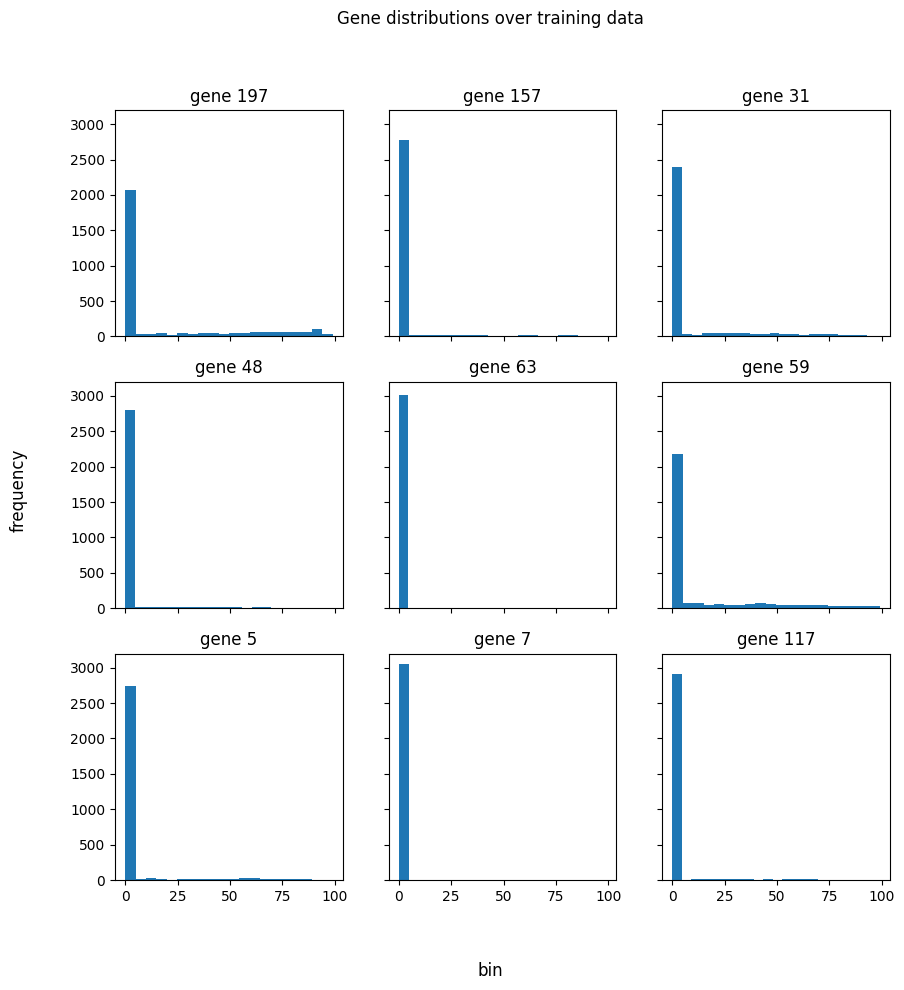

In [5]:
fig, axs = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(10,10))
k = 0
for i in range(3):
    for j in range(3):
        axs[i,j].hist(gene_dist[:,k], bins=20)
        axs[i,j].set_title(f'gene {idx[k]}')
        k += 1
fig.supxlabel('bin')
fig.supylabel('frequency')
fig.suptitle('Gene distributions over training data')
plt.savefig('../fig/example_gene_dist.png')

In [6]:
mask = torch.load('../data/test_masks.pt', map_location=torch.device('cpu'))
label = torch.load('../data/test_values.pt', map_location=torch.device('cpu'))

In [7]:
mask.shape

torch.Size([3054, 200])

In [8]:
label[1][mask[1]]
all_bins = torch.tensor([])
for i in range(len(label)):
    bins = label[i][mask[i]]
    all_bins = torch.cat([all_bins, bins])
all_bins = all_bins.numpy()   

In [9]:
from collections import Counter

In [10]:
val = list(Counter(all_bins).values())
bins = list(Counter(all_bins).keys())
bins.sort()
summe = 0
for i in val[1:]:
    summe += i
summe

133694

In [11]:
c = Counter(all_bins)
c = dict(sorted(c.items()))
for k, v in c.items():
    print(k, v)

0.0 68352
1.0 615
2.0 641
3.0 631
4.0 717
5.0 758
6.0 669
7.0 685
8.0 721
9.0 697
10.0 678
11.0 668
12.0 712
13.0 687
14.0 679
15.0 661
16.0 671
17.0 634
18.0 699
19.0 663
20.0 704
21.0 664
22.0 650
23.0 694
24.0 687
25.0 717
26.0 673
27.0 709
28.0 718
29.0 720
30.0 689
31.0 624
32.0 642
33.0 660
34.0 689
35.0 643
36.0 711
37.0 697
38.0 585
39.0 678
40.0 650
41.0 694
42.0 686
43.0 673
44.0 751
45.0 682
46.0 637
47.0 590
48.0 652
49.0 703
50.0 680
51.0 644
52.0 619
53.0 714
54.0 664
55.0 672
56.0 659
57.0 686
58.0 696
59.0 674
60.0 701
61.0 660
62.0 666
63.0 658
64.0 660
65.0 651
66.0 675
67.0 703
68.0 670
69.0 625
70.0 658
71.0 721
72.0 681
73.0 643
74.0 686
75.0 645
76.0 661
77.0 680
78.0 703
79.0 691
80.0 662
81.0 649
82.0 646
83.0 703
84.0 654
85.0 678
86.0 683
87.0 677
88.0 657
89.0 684
90.0 661
91.0 667
92.0 671
93.0 655
94.0 669
95.0 677
96.0 682
97.0 673
98.0 672


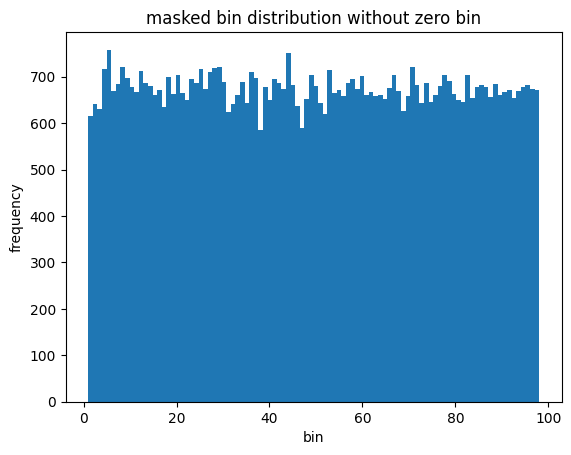

In [12]:
plt.hist(all_bins[all_bins > 0], bins=98);
plt.xlabel('bin')
plt.ylabel('frequency')
plt.title('masked bin distribution without zero bin');
plt.savefig('bin_distribution_corrected.png')

In [13]:
all_bins = torch.tensor([])
for i in range(len(label)):
    all_bins = torch.cat([all_bins, label[i]])
all_bins = all_bins.numpy()   

In [14]:
path = '../data/test_values_wholeDataset.pt'
train_data = torch.load(path)

In [15]:
train_data.shape

(3696, 200)

In [16]:
all_bins = torch.tensor([])
for i in range(len(label)):
    all_bins = torch.cat([all_bins, label[i]])
all_bins = all_bins.numpy()  

In [17]:
Counter(all_bins)

Counter({0.0: 544751,
         5.0: 758,
         44.0: 751,
         8.0: 724,
         71.0: 721,
         4.0: 720,
         29.0: 720,
         28.0: 718,
         25.0: 717,
         53.0: 714,
         12.0: 712,
         36.0: 711,
         27.0: 709,
         20.0: 704,
         67.0: 703,
         83.0: 703,
         78.0: 703,
         49.0: 703,
         60.0: 701,
         18.0: 699,
         9.0: 698,
         37.0: 697,
         58.0: 696,
         23.0: 694,
         41.0: 694,
         79.0: 691,
         34.0: 689,
         30.0: 689,
         24.0: 687,
         13.0: 687,
         74.0: 686,
         57.0: 686,
         42.0: 686,
         7.0: 685,
         89.0: 684,
         86.0: 683,
         45.0: 682,
         96.0: 682,
         72.0: 681,
         10.0: 681,
         77.0: 680,
         50.0: 680,
         14.0: 679,
         85.0: 678,
         39.0: 678,
         87.0: 677,
         95.0: 677,
         66.0: 675,
         43.0: 675,
         59.0: 674,
   

In [18]:
bins = np.quantile(all_bins[all_bins > 0], np.linspace(0, 1, 99))

In [19]:
bins

array([ 1.        ,  2.        ,  3.        ,  4.        ,  5.        ,
        5.79591837,  7.        ,  7.        ,  8.        ,  9.        ,
       10.        , 11.        , 12.        , 13.        , 14.        ,
       15.        , 16.        , 17.        , 18.        , 19.        ,
       20.        , 21.        , 22.        , 23.        , 24.        ,
       25.        , 26.        , 27.        , 28.        , 29.        ,
       30.        , 31.        , 32.        , 33.        , 34.        ,
       35.        , 36.        , 37.        , 38.        , 39.        ,
       40.        , 41.        , 42.        , 43.        , 44.        ,
       45.        , 46.        , 47.        , 48.        , 49.        ,
       50.        , 51.        , 52.        , 53.        , 54.        ,
       55.        , 56.        , 57.        , 58.        , 59.        ,
       60.        , 61.        , 62.        , 63.        , 64.        ,
       65.        , 66.        , 67.        , 68.        , 69.  

In [20]:
all_bins[all_bins > 0]

array([45.,  7.,  7., ..., 14., 14., 14.], dtype=float32)

In [21]:
label_train = torch.load('../data/bin_investigation_train.pt', map_location=torch.device('cpu'))
label_test = torch.load('../data/bin_investigation_test.pt', map_location=torch.device('cpu'))

In [22]:
label_train.shape[0] * label_train.shape[1]

610800

In [23]:
all_bin = []
for row in np.vstack((label_test, label_train)):
    all_bin += list(row)

In [24]:
c = Counter(all_bin)
c = dict(sorted(c.items()))
for k, v in c.items():
    print(k, v)


0 630514
1 790
2 746
3 766
4 777
5 810
6 796
7 795
8 793
9 803
10 796
11 765
12 806
13 791
14 763
15 756
16 782
17 757
18 761
19 769
20 776
21 798
22 758
23 786
24 764
25 823
26 735
27 819
28 775
29 774
30 806
31 739
32 767
33 776
34 793
35 776
36 811
37 779
38 769
39 803
40 759
41 762
42 785
43 811
44 819
45 778
46 804
47 777
48 771
49 778
50 808
51 771
52 766
53 796
54 775
55 772
56 759
57 783
58 787
59 779
60 795
61 758
62 781
63 774
64 785
65 779
66 766
67 801
68 778
69 792
70 769
71 789
72 780
73 773
74 786
75 775
76 779
77 790
78 793
79 785
80 765
81 774
82 775
83 780
84 773
85 777
86 777
87 783
88 772
89 781
90 775
91 787
92 765
93 771
94 786
95 782
96 786
97 777
98 783


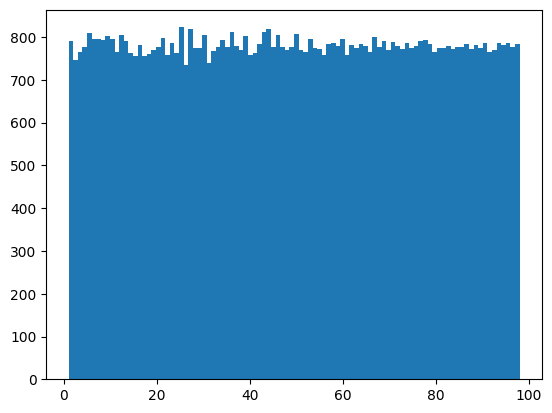

In [25]:
all_bin = np.array(all_bin)
plt.hist(all_bin[all_bin>0], bins=98)
plt.show()

In [26]:
np.unique(all_bin)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98])

# Check distributions of predicted bins in course of training

- use only Pancreas data set and use whole dataset for train and test split
- train for 200 epochs
- run: https://wandb.ai/sctransformer/cluster_test5/runs/b6l35eo0?workspace=user-florian-krgl

In [27]:
path_pred1 = '../data/predictions_None_epoch_20.pt'
path_pred2 = '../data/predictions_None_epoch_100.pt'
path_pred3 = '../data/predictions_None_epoch_199.pt'
pred1 = torch.load(path_pred1, map_location=torch.device('cpu'))
pred2 = torch.load(path_pred2, map_location=torch.device('cpu'))
pred3 = torch.load(path_pred3, map_location=torch.device('cpu'))

In [28]:
s = nn.Softmax(dim=0)
s(pred1[0,0,:])
# for i in range(pred.shape[0]):
#     print(s(pred[i, 0 ,:]))
soft_pred1 = s(pred1)
soft_pred2 = s(pred2)
soft_pred3 = s(pred3)

In [29]:
torch.max(soft_pred1, dim=2).values.shape

torch.Size([481, 200])

In [30]:
gen_1_pred = torch.argmax(soft_pred1, dim=2)[:,1]
gen_1_pred[gen_1_pred > 0]

tensor([81, 11, 11, 81, 81, 81, 79, 81, 58, 81, 81, 73, 81, 81, 81, 11, 81, 81,
        81, 79, 81, 81, 11, 81, 81, 81, 31, 11, 11, 81, 81, 81, 81, 81, 81, 81,
        73,  5, 81, 11, 81, 73, 81, 73, 11, 11, 81,  3, 81, 56, 81, 88, 81, 81,
        83, 81, 81, 11, 81, 58, 81,  8, 11, 11, 81, 11, 58, 81,  3, 81, 81, 78,
        31, 88, 81, 79, 78, 58,  9, 31, 11, 81, 81, 79, 81, 47, 81, 78, 41, 11,
        81, 42, 81, 81,  3,  3, 81, 81, 81, 81, 81, 41, 79, 81, 41, 81, 74, 81,
        81, 31, 81, 11, 11, 81, 58, 81, 48, 47, 11, 11])

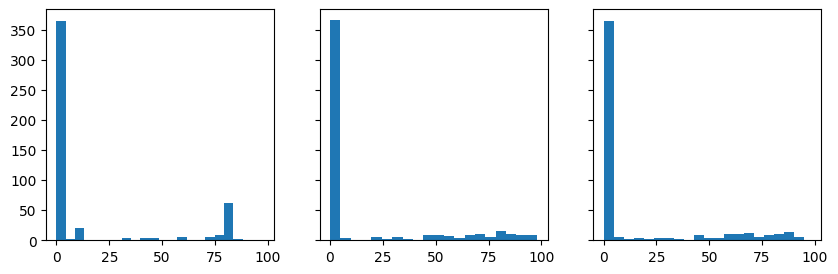

In [31]:
#print(torch.argmax(soft_pred1, dim=2)[:,1])
gen_1_pred = torch.argmax(soft_pred1, dim=2)[:,1]
gen_1_pred = gen_1_pred[gen_1_pred > 0]
fig, ax = plt.subplots(1,3, figsize=(10,3), sharex=True, sharey=True)
ax[0].hist(torch.argmax(soft_pred1, dim=2)[:,1], bins=20);
ax[1].hist(torch.argmax(soft_pred2, dim=2)[:,1], bins=20);
ax[2].hist(torch.argmax(soft_pred3, dim=2)[:,1], bins=20);

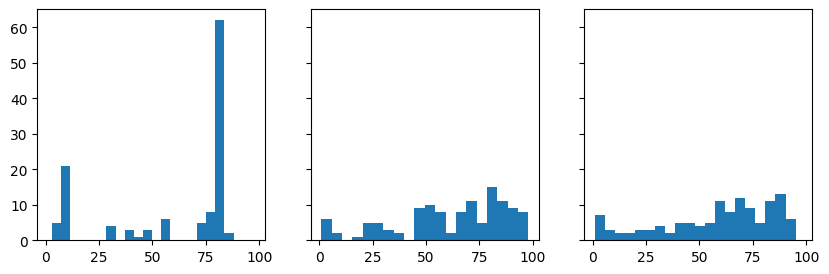

In [32]:
#print(torch.argmax(soft_pred1, dim=2)[:,1])
gen_1_pred = torch.argmax(soft_pred1, dim=2)[:,1]
gen_1_pred = gen_1_pred[gen_1_pred > 0]
gen_2_pred = torch.argmax(soft_pred2, dim=2)[:,1]
gen_2_pred = gen_2_pred[gen_2_pred > 0]
gen_3_pred = torch.argmax(soft_pred3, dim=2)[:,1]
gen_3_pred = gen_3_pred[gen_3_pred > 0]
fig, ax = plt.subplots(1,3, figsize=(10,3), sharex=True, sharey=True)
ax[0].hist(gen_1_pred, bins=20);
ax[1].hist(gen_2_pred, bins=20);
ax[2].hist(gen_3_pred, bins=20);

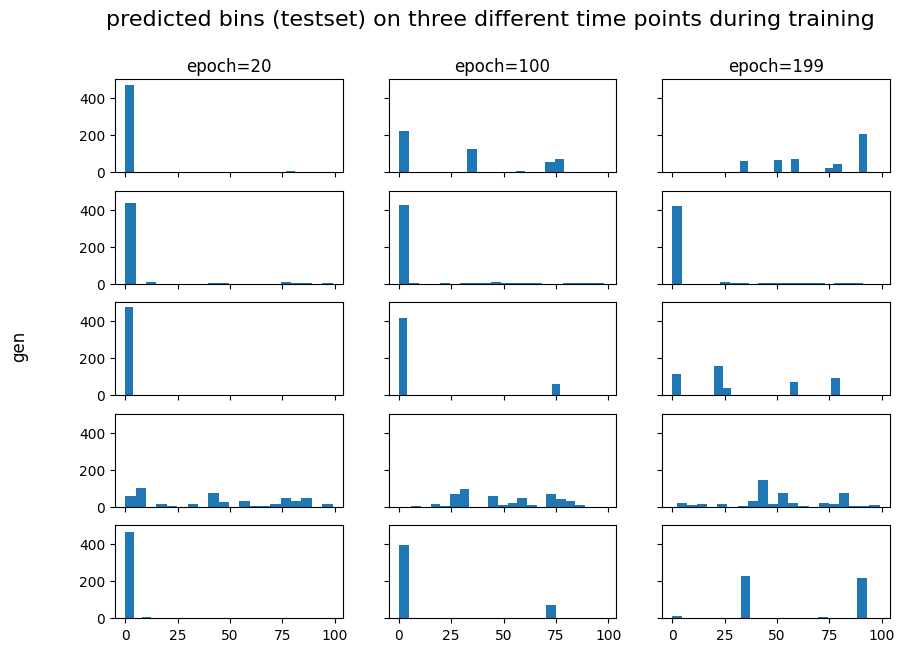

In [33]:
from matplotlib.gridspec import GridSpec
np.random.seed(42)
gens = np.random.choice(np.arange(200), 5, replace=False)
soft = [soft_pred1, soft_pred2, soft_pred3]
time_points = 3
n_genes = len(gens)
fig, ax = plt.subplots(n_genes,time_points, figsize=(10,7), sharex=True, sharey=True)
for i in range(n_genes):
    for j in range(time_points):
        ax[i,j].hist(torch.argmax(soft[j], dim=2)[:,gens[i]], bins=20);
#         ax[i,j].hist(torch.argmax(soft_pred2, dim=2)[:,gens[i]], bins=20);
#         ax[i,j].hist(torch.argmax(soft_pred3, dim=2)[:,gens[i]], bins=20);
ax[0,0].set_title('epoch=20')
ax[0,1].set_title('epoch=100')
ax[0,2].set_title('epoch=199')
fig.supylabel('gen')
fig.suptitle('predicted bins (testset) on three different time points during training', fontsize=16)
plt.savefig('predicted_bins.png')

In [34]:
from matplotlib.gridspec import GridSpec
np.random.seed(42)
gens = np.random.choice(np.arange(200), 5, replace=False)
soft = [soft_pred1, soft_pred2, soft_pred3]
time_points = 3
n_genes = len(gens)
fig = plt.figure(figsize=(10,7), sharex=True, sharey=True)
gs = GridSpec(n_genes, time_points)
ax = []
for i in range(3):
    ax.append(fig.add_subplot(gs[:, i]))

for i in range(3):
    ax[i].plot([1, 2, 3, 4, 5], [4, 5, 6, 7, 8]) 
    

fig, ax = plt.subplots(n_genes,time_points, figsize=(10,7), sharex=True, sharey=True)
for i in range(n_genes):
    for j in range(time_points):
        ax[i,j].hist(torch.argmax(soft[j], dim=2)[:,gens[i]], bins=20);
#         ax[i,j].hist(torch.argmax(soft_pred2, dim=2)[:,gens[i]], bins=20);
#         ax[i,j].hist(torch.argmax(soft_pred3, dim=2)[:,gens[i]], bins=20);
fig.supxlabel('time point')
fig.supylabel('gen')
fig.suptitle('predicted bins (testset) on three different time points during training', fontsize=16)
#plt.savefig('predicted_bins.png')

AttributeError: Figure.set() got an unexpected keyword argument 'sharex'

# Gene expression distribution of cell types

After the preprocessing, how much do the bin distributions of the different cell types vary? The goal here is to check wether the cell types are so similar that the transformer has an easy time to generalize

In [4]:
anndata = scv.datasets.pancreatic_endocrinogenesis()
pancreas_binned = torch.load('../data/pancreas_binned.pt')

In [5]:
clusters = anndata.obs.clusters.values
idx = np.arange(len(clusters))
cell_types = ['Ductal', 'Ngn3 low EP', 'Ngn3 high EP', 'Pre-endocrine', 'Beta', 'Alpha', 'Delta', 'Epsilon']

In [6]:
n_gene = 200
ductal_idx = idx[clusters == 'Ductal']
ductal_idx = idx[clusters == 'Ductal']
gene_idx = np.arange(n_gene)
ductal = pancreas_binned[ductal_idx]

### Select interesting genes
The question is how do we find genes that strongly vary across cell types? I found the normalized dispersion as a good measure for that.

In [7]:
anndata = scv.datasets.pancreatic_endocrinogenesis()
# filter by counts of genes
min_counts_genes = 10
sc.pp.filter_genes(anndata, 
                   min_counts=min_counts_genes
)

# normalize counts
sc.pp.normalize_total(anndata)

# log1p transformation
# without log1p row sums are all equal, with log1p they slightly differ
sc.pp.log1p(anndata)
# get hvgs
n_hvg = 200
sc.pp.highly_variable_genes(anndata, n_top_genes=n_hvg, subset=True)
anndata.var['num_idx'] = np.arange(anndata.shape[1])

In [8]:
# select the most dispersed genes in the whole dataset and get there idx
n_top = 16
top_disperesed = anndata.var.dispersions.sort_values(ascending=False).index[:n_top]
# create a df that maps the sorted (decending) most dispresed genes to their idx
sorted_df = anndata.var[anndata.var.index.isin(top_disperesed)].sort_values(by='dispersions', ascending=False)
top_disperesed_to_idx = sorted_df['num_idx']
anndata.var.sort_values(by='dispersions', ascending=False)[:n_top]

,highly_variable_genes,n_counts,highly_variable,means,dispersions,dispersions_norm,num_idx
index,,,,,,,
Sst,True,16472.0,True,1.747951,6.215282,3.837064,74
Ins1,True,49244.0,True,2.484974,5.833311,3.582948,87
Gast,True,5470.0,True,0.948349,4.414977,7.996919,41
Ppy,True,6181.0,True,0.994381,4.021865,7.224322,29
Ttr,True,78724.0,True,3.090269,3.675327,3.606725,83
Npy,True,2188.0,True,0.396089,3.621224,14.645685,149
Lrpprc,True,11831.0,True,1.502625,3.544081,5.020284,80
Stmn2,True,49.0,True,0.009809,3.340347,16.268202,106
Ifitm1,True,466.0,True,0.117092,3.339849,16.265713,171


In [9]:
# check if unbinned profiles match the binned profiles
i = 0
anndata_a = anndata.X.toarray()
print(anndata_a[i][anndata_a[i].nonzero()])
print(pancreas_binned[i][pancreas_binned[i].nonzero()])

[0.811716  0.811716  1.2537732 1.5592611 0.811716  0.811716  3.1583543
 0.811716  0.811716  0.811716  0.811716  1.2537732 0.811716  0.811716
 1.2537732 0.811716  0.811716  1.7929379]
[41 41 66 77 41 41 97 41 41 41 41 66 41 41 66 41 41 84]


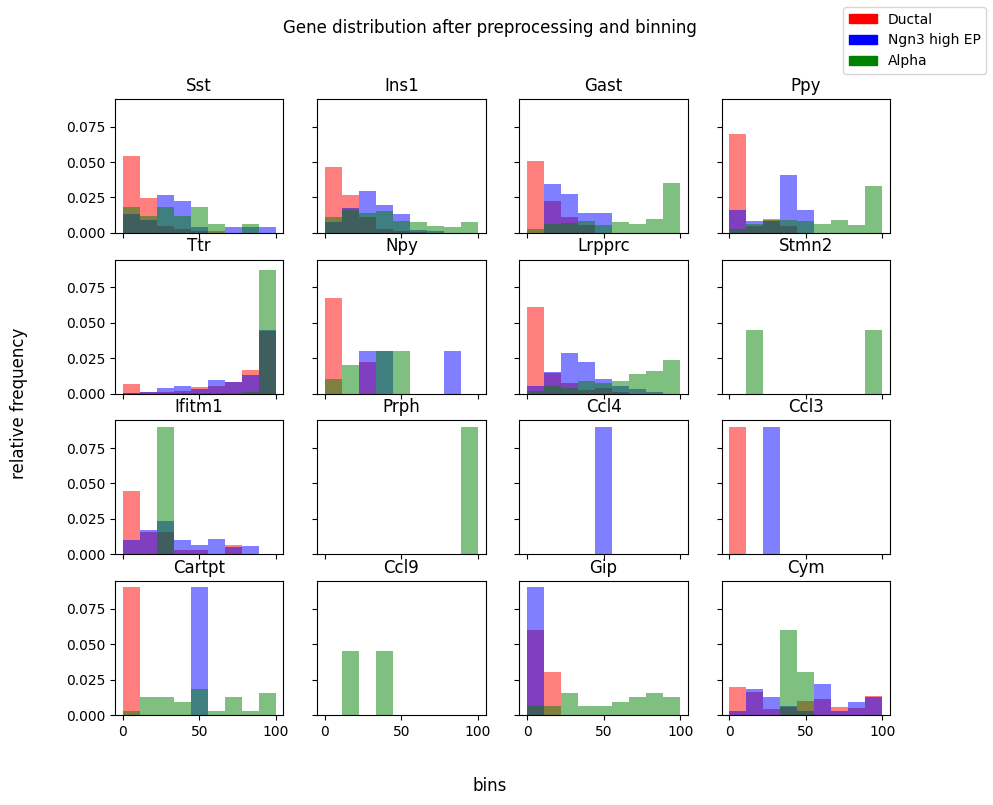

In [9]:
#print(ductal.shape)
n_row = 4
n_col = 4
bins = np.linspace(0, 100, 10)
idx = np.arange(len(clusters))
fig, ax = plt.subplots(n_row,n_col, figsize=(10,8), sharex=True, sharey=True)
col = 0
row = 0
k = 0
cell_types = ['Ductal','Ngn3 high EP','Alpha']
color = ['red', 'blue', 'green']
#color = ['orange', 'purple', 'darkgreen']
#color = ['teal', 'pink', 'darkred']
# color = ['cyan', 'magenta', 'yellow']
for i in range(n_row):
    for j in range(n_col):
        # select most dispresed gene in decending order
        gene_idx = top_disperesed_to_idx[k]
        gene_name = top_disperesed_to_idx.index[k]
        # get the bin distribution of the gene per cell type
#         print(gene_name)
        for c,ct in enumerate(cell_types):
            idx_cluster_members = idx[clusters == ct]
            profile_cluster_members = pancreas_binned[idx_cluster_members]
#             print(profile_cluster_members[:,gene_idx].shape)
#             print(profile_cluster_members[:,gene_idx])
            cluster_gene_values = profile_cluster_members[:,gene_idx]
            non_zero_profiles = cluster_gene_values[cluster_gene_values.nonzero()]
#             print(f'cluster {ct} has {len(profile_cluster_members)} members and {len(non_zero_profiles)}'
#                  f' samples with a non zero bin')
            ax[i, j].hist(non_zero_profiles, alpha=0.5, bins=bins, density=True, color=color[c])
            ax[i, j].set_title(gene_name)
        k += 1
#         print()
# create patches for legend
patches = []
for i in range(len(cell_types)):
    patches.append(mpatches.Patch(color=color[i], label=cell_types[i]))
fig.legend(handles=patches, loc='upper right')
fig.supxlabel('bins')
fig.supylabel('relative frequency')
fig.suptitle('Gene distribution after preprocessing and binning');
#plt.savefig('../gene_distribution_most_dispersed_clusterwise.png')

In [19]:
np.unique(pancreas_binned[:,22])

array([ 0, 13, 17, 36, 96])

In [18]:
np.unique(pancreas_binned)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [11]:
print(clusters)

['Pre-endocrine', 'Ductal', 'Alpha', 'Ductal', 'Ngn3 high EP', ..., 'Pre-endocrine', 'Ngn3 high EP', 'Ductal', 'Alpha', 'Epsilon']
Length: 3696
Categories (8, object): ['Ductal', 'Ngn3 low EP', 'Ngn3 high EP', 'Pre-endocrine', 'Beta', 'Alpha', 'Delta', 'Epsilon']


In [21]:
idx_cluster_members = idx[clusters == 'Alpha']
profile_cluster_members = pancreas_binned[idx_cluster_members]
print(np.unique(profile_cluster_members[:,106]))
#             print(profile_cluster_members[:,gene_idx].shape)
#             print(profile_cluster_members[:,gene_idx])
#cluster_gene_values = profile_cluster_members[:,gene_idx]

[ 0 19 98]


In [11]:
!pwd

/home/florian/PycharmProjects/scTransformer/src


In [12]:
idx_cluster_members = idx[clusters == 'Alpha']
profile_cluster_members = pancreas_binned[idx_cluster_members]
non_zero_idx = profile_cluster_members[1].nonzero()
non_zero_idx = profile_cluster_members.nonzero()
profile_cluster_members[non_zero_idx[0], non_zero_idx[1]].shape

(12553,)

In [9]:
np.max(anndata.X.toarray())

7.113879

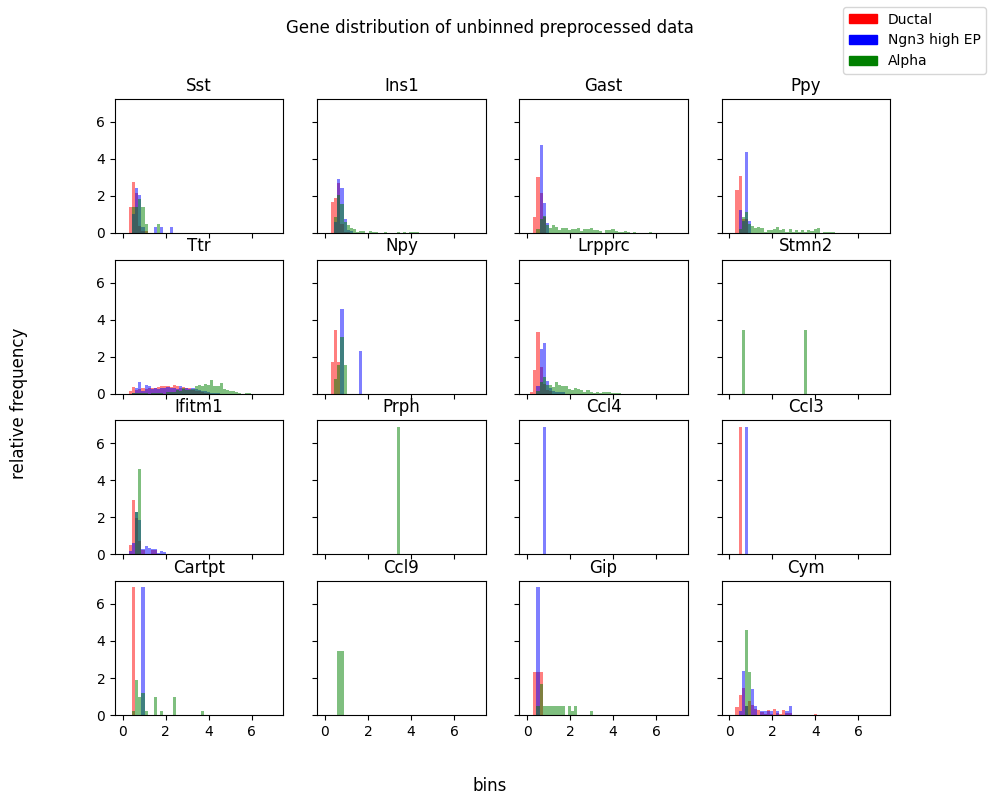

In [62]:
#print(ductal.shape)
n_row = 4
n_col = 4
bins = np.linspace(np.min(anndata.X.toarray()), np.max(anndata.X.toarray()), 50)
idx = np.arange(len(clusters))
fig, ax = plt.subplots(n_row,n_col, figsize=(10,8), sharex=True, sharey=True)
cell_types = ['Ductal','Ngn3 high EP','Alpha']
color = ['red', 'blue', 'green']
col = 0
row = 0
k = 0
for i in range(n_row):
    for j in range(n_col):
        gene_idx = top_disperesed_to_idx[k]
        gene_name = top_disperesed_to_idx.index[k]
        for c, ct in enumerate(cell_types):
            idx_cluster_members = idx[clusters == ct]
            profile_cluster_members = anndata.X.toarray()[idx_cluster_members]
#             print(profile_cluster_members[:,gene_idx].shape)
#             print(profile_cluster_members[:,gene_idx])
            cluster_gene_values = profile_cluster_members[:,gene_idx]
            non_zero_profiles = cluster_gene_values[cluster_gene_values.nonzero()]
#             print(f'cluster {ct} has {len(profile_cluster_members)} members and {len(non_zero_profiles)}'
#                  f' samples with a non zero bin')
            ax[i, j].hist(non_zero_profiles, alpha=0.5, bins=bins, density=True, color=color[c])
            ax[i, j].set_title(gene_name)
        k += 1
# create patches for legend
patches = []
for i in range(len(cell_types)):
    patches.append(mpatches.Patch(color=color[i], label=cell_types[i]))
fig.legend(handles=patches, loc='upper right')
fig.supxlabel('bins')
fig.supylabel('relative frequency')
fig.suptitle('Gene distribution of unbinned preprocessed data');
plt.savefig('../gene_distribution_most_dispersed_clusterwise_unbinned.png')

### compare raw data distribution with binned data distribution

In [253]:
# select the most dispersed genes in the whole dataset and get there idx
n_top = 16
top_disperesed = anndata.var.dispersions.sort_values(ascending=False).index[:n_top]
# create a df that maps the sorted (decending) most dispresed genes to their idx
sorted_df = anndata.var[anndata.var.index.isin(top_disperesed)].sort_values(by='dispersions', ascending=False)
top_disperesed_to_idx = sorted_df['num_idx']
anndata.var.sort_values(by='dispersions', ascending=False)[:n_top]

,highly_variable_genes,n_counts,highly_variable,means,dispersions,dispersions_norm,num_idx
index,,,,,,,
Sst,True,16472.0,True,1.747951,6.215282,3.837064,74
Ins1,True,49244.0,True,2.484974,5.833311,3.582948,87
Gast,True,5470.0,True,0.948349,4.414977,7.996919,41
Ppy,True,6181.0,True,0.994381,4.021865,7.224322,29
Ttr,True,78724.0,True,3.090269,3.675327,3.606725,83
Npy,True,2188.0,True,0.396089,3.621224,14.645685,149
Lrpprc,True,11831.0,True,1.502625,3.544081,5.020284,80
Stmn2,True,49.0,True,0.009809,3.340347,16.268202,106
Ifitm1,True,466.0,True,0.117092,3.339849,16.265713,171


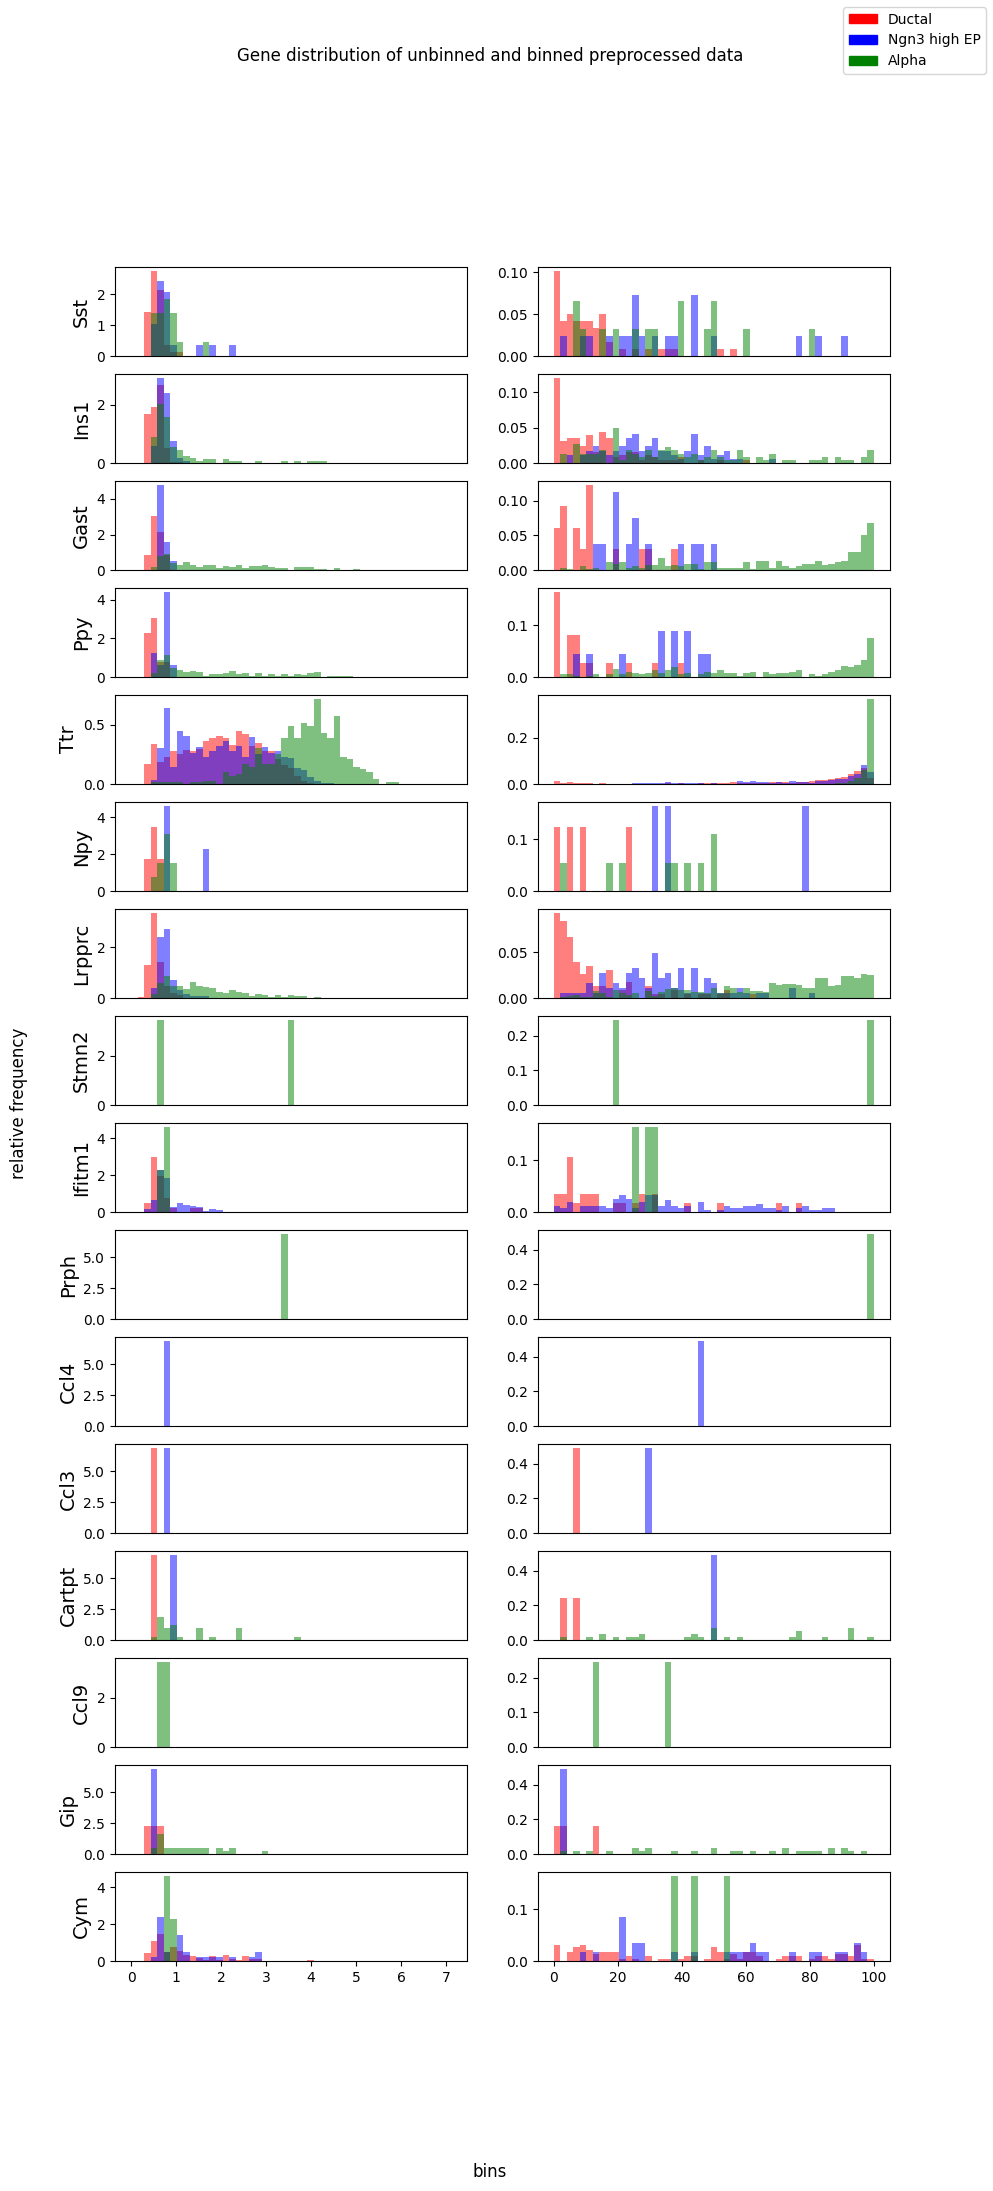

In [255]:
n_row = 16
n_col = 2
bins_raw = np.linspace(np.min(anndata.X.toarray()), np.max(anndata.X.toarray()), 50)
bins_binned = np.linspace(0, 100, 50)
idx = np.arange(len(clusters))
fig, ax = plt.subplots(n_row,n_col, figsize=(10,22), sharex=False, sharey=False)
cell_types = ['Ductal','Ngn3 high EP','Alpha']
color = ['red', 'blue', 'green']
col = 0
row = 0
k = 0
for i in range(n_row):
    gene_idx = top_disperesed_to_idx[i]
    gene_name = top_disperesed_to_idx.index[i]
    for c, ct in enumerate(cell_types):
        idx_cluster_members = idx[clusters == ct]
        profile_cluster_members_raw = anndata.X.toarray()[idx_cluster_members]
        profile_cluster_members_binned = pancreas_binned[idx_cluster_members]
#             print(profile_cluster_members[:,gene_idx].shape)
#             print(profile_cluster_members[:,gene_idx])
        cluster_gene_values_raw = profile_cluster_members_raw[:,gene_idx]
        non_zero_profiles_raw = cluster_gene_values_raw[cluster_gene_values_raw.nonzero()]
        cluster_gene_values_binned = profile_cluster_members_binned[:,gene_idx]
        non_zero_profiles_binned = cluster_gene_values_binned[cluster_gene_values_binned.nonzero()]
#             print(f'cluster {ct} has {len(profile_cluster_members)} members and {len(non_zero_profiles)}'
#                  f' samples with a non zero bin')
        ax[i, 0].hist(non_zero_profiles_raw, alpha=0.5, bins=bins_raw, density=True, color=color[c])
        ax[i, 1].hist(non_zero_profiles_binned, alpha=0.5, bins=bins_binned, density=True, color=color[c])
        ax[i, 0].set_ylabel(gene_name, fontsize=14)
        if i < n_row-1:
            ax[i, 0].set_xticks([])
            ax[i, 0].set_xticklabels([])
            ax[i, 1].set_xticks([])
            ax[i, 1].set_xticklabels([])
#         k += 1
# create patches for legend
patches = []
for i in range(len(cell_types)):
    patches.append(mpatches.Patch(color=color[i], label=cell_types[i]))
fig.legend(handles=patches, loc='upper right')
fig.supxlabel('bins')
fig.supylabel('relative frequency')
fig.suptitle('Gene distribution of unbinned and binned preprocessed data');

#plt.savefig('../gene_distribution_comparison_moreBins.png')

### Gene distributions of Genes that have the highest dispersion between the cells of type Ductal, 'Ngn3 high EP' and Alpha

In [233]:
anndata = scv.datasets.pancreatic_endocrinogenesis()
clusters = anndata.obs.clusters.values
idx = np.arange(len(clusters))
idx_cluster_members = idx[clusters.isin(['Ductal','Ngn3 high EP','Alpha'])]

Here the binned data is generated and not laoded to ensure that the profiles of binned and unbinned expression values can be accessed with the same index

In [234]:
# preprocess only cluster memebers

anndata = anndata[idx_cluster_members]
# filter by counts of genes
min_counts_genes = 10
sc.pp.filter_genes(anndata, 
                   min_counts=min_counts_genes
)

# normalize counts
sc.pp.normalize_total(anndata)

# log1p transformation
# without log1p row sums are all equal, with log1p they slightly differ
sc.pp.log1p(anndata)
# get hvgs
n_hvg = 200
sc.pp.highly_variable_genes(anndata, n_top_genes=n_hvg, subset=True)
anndata.var['num_idx'] = np.arange(anndata.shape[1])

In [235]:
# bin only cluster memebers
data = anndata.X.toarray()
n_bins = 100
binned_rows = []
# perform value binning for whole data set
idx_non_zero_i, idx_non_zero_j = data.nonzero()
values_non_zero = data[idx_non_zero_i, idx_non_zero_j]
# get borders of equally distributed bins
bins = np.quantile(values_non_zero, np.linspace(0, 1, n_bins))

for row in data:
    non_zero_ids = row.nonzero()
    non_zero_row = row[non_zero_ids]
    # spread all values equally across the bins
    #non_zero_digits = self._digitize(non_zero_row, bins)
    non_zero_digits = np.digitize(non_zero_row, bins, right=True)
    binned_row = np.zeros_like(row, dtype=np.int64)
    # assign genes to bins
    binned_row[non_zero_ids] = non_zero_digits
    binned_rows.append(binned_row)
# construct matrix from binned rows
pancreas_binned = np.stack(binned_rows)

In [236]:
i = 3
anndata_a = anndata.X.toarray()
print(anndata_a[i][anndata_a[i].nonzero()])
print(pancreas_binned[i][pancreas_binned[i].nonzero()])

[1.8283975  1.5928874  0.83550406 1.2842485  1.2842485  0.83550406
 0.83550406 2.3166687  2.8137136  0.83550406 1.2842485  0.83550406
 1.2842485  1.2842485  1.5928874  1.5928874  1.8283975  1.2842485
 2.178818   0.83550406 1.2842485  2.0188792  1.2842485  1.2842485
 0.83550406 0.83550406 2.178818   0.83550406]
[82 75 39 63 63 39 39 91 95 39 63 39 63 63 75 75 82 63 89 39 63 87 63 63
 39 39 89 39]


In [237]:
# select the most dispersed genes in the whole dataset and get there idx
n_top = 16
top_disperesed = anndata.var.dispersions.sort_values(ascending=False).index[:n_top]
# create a df that maps the sorted (decending) most dispresed genes to their idx
sorted_df = anndata.var[anndata.var.index.isin(top_disperesed)].sort_values(by='dispersions', ascending=False)
top_disperesed_to_idx = sorted_df['num_idx']
anndata.var.sort_values(by='dispersions', ascending=False)[:n_top]

,highly_variable_genes,n_counts,highly_variable,means,dispersions,dispersions_norm,num_idx
index,,,,,,,
Ghrl,True,1851.0,True,0.628069,4.823131,11.262065,153
Rbp4,True,18366.0,True,2.356205,4.350577,3.702849,89
Gast,True,3635.0,True,1.095496,4.314478,6.935549,39
Chgb,True,9793.0,True,1.933543,4.112555,3.415109,103
Ppy,True,2448.0,True,0.833919,3.988671,8.350372,31
Spp1,True,68734.0,True,3.357100,3.501502,3.437755,142
Stmn2,True,46.0,True,0.016996,3.498429,17.090839,112
Slc38a5,True,7562.0,True,1.592640,3.442888,3.811696,194
Prph,True,40.0,True,0.014705,3.408008,16.636818,75


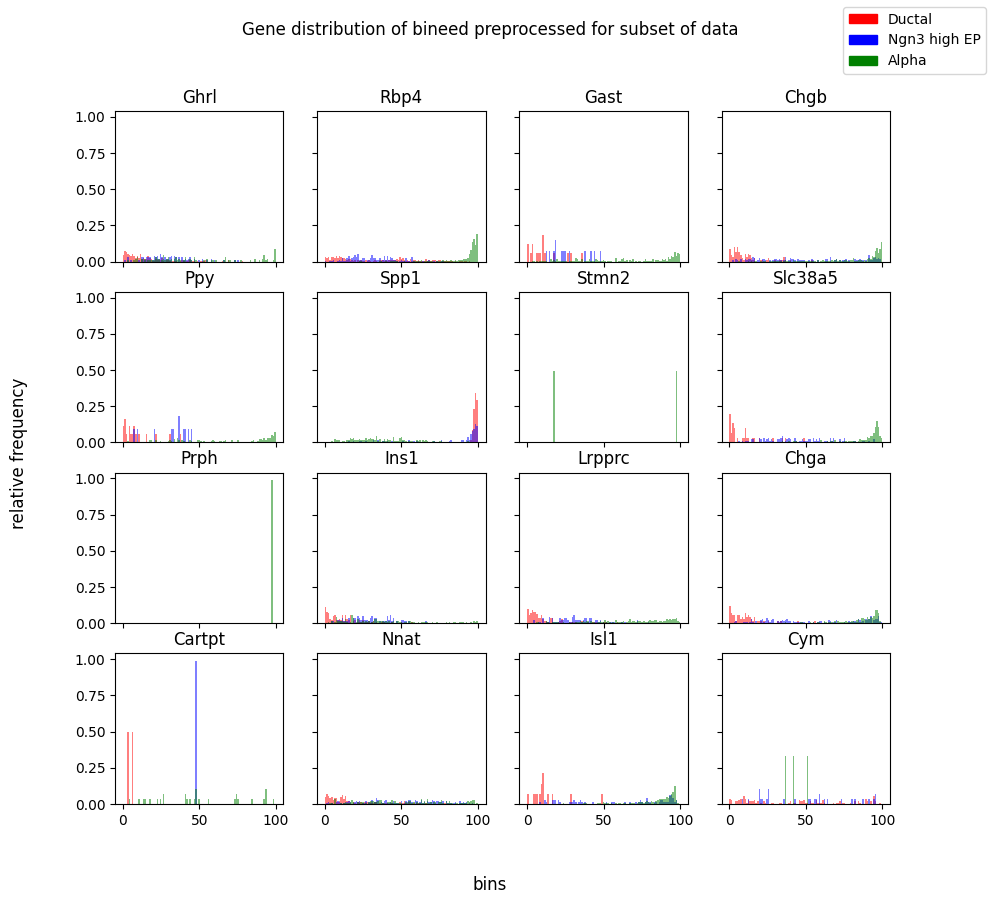

In [238]:
n_row = 4
n_col = 4
#bins = np.linspace(np.min(anndata.X.toarray()), np.max(anndata.X.toarray()), 50)
bins = np.linspace(0, 100, 100)
idx = np.arange(len(clusters))
fig, ax = plt.subplots(n_row,n_col, figsize=(10,9), sharex=True, sharey=True)
cell_types = ['Ductal','Ngn3 high EP','Alpha']
idx = np.arange(anndata.shape[0])
clusters = anndata.obs.clusters.values
color = ['red', 'blue', 'green']
col = 0
row = 0
k = 0
for i in range(n_row):
    for j in range(n_col):
        gene_idx = top_disperesed_to_idx[k]
        gene_name = top_disperesed_to_idx.index[k]
        for c, ct in enumerate(cell_types):
#             print(ct)
#             print(len(clusters))
#             print(len(idx))
            idx_cluster_members = idx[clusters == ct]
#             profile_cluster_members = anndata.X.toarray()[idx_cluster_members]
            profile_cluster_members = pancreas_binned[idx_cluster_members]
#             print(profile_cluster_members[:,gene_idx].shape)
#             print(profile_cluster_members[:,gene_idx])
            cluster_gene_values = profile_cluster_members[:,gene_idx]
            non_zero_profiles = cluster_gene_values[cluster_gene_values.nonzero()]
#             print(f'cluster {ct} has {len(profile_cluster_members)} members and {len(non_zero_profiles)}'
#                  f' samples with a non zero bin')
            ax[i, j].hist(non_zero_profiles, alpha=0.5, bins=bins, density=True, color=color[c])
            ax[i, j].set_title(gene_name)
        k += 1
# create patches for legend
patches = []
for i in range(len(cell_types)):
    patches.append(mpatches.Patch(color=color[i], label=cell_types[i]))
fig.legend(handles=patches, loc='upper right')
fig.supxlabel('bins')
fig.supylabel('relative frequency')
fig.suptitle('Gene distribution of bineed preprocessed for subset of data');
#plt.savefig('../gene_distribution_threeSubclusters_binned.png')

### NEXT
try to make the plot obove for the binned pancreas data. For this we need to bin the data again, only sunig the three clusters

Maybe the i have to subset the pancreas data!

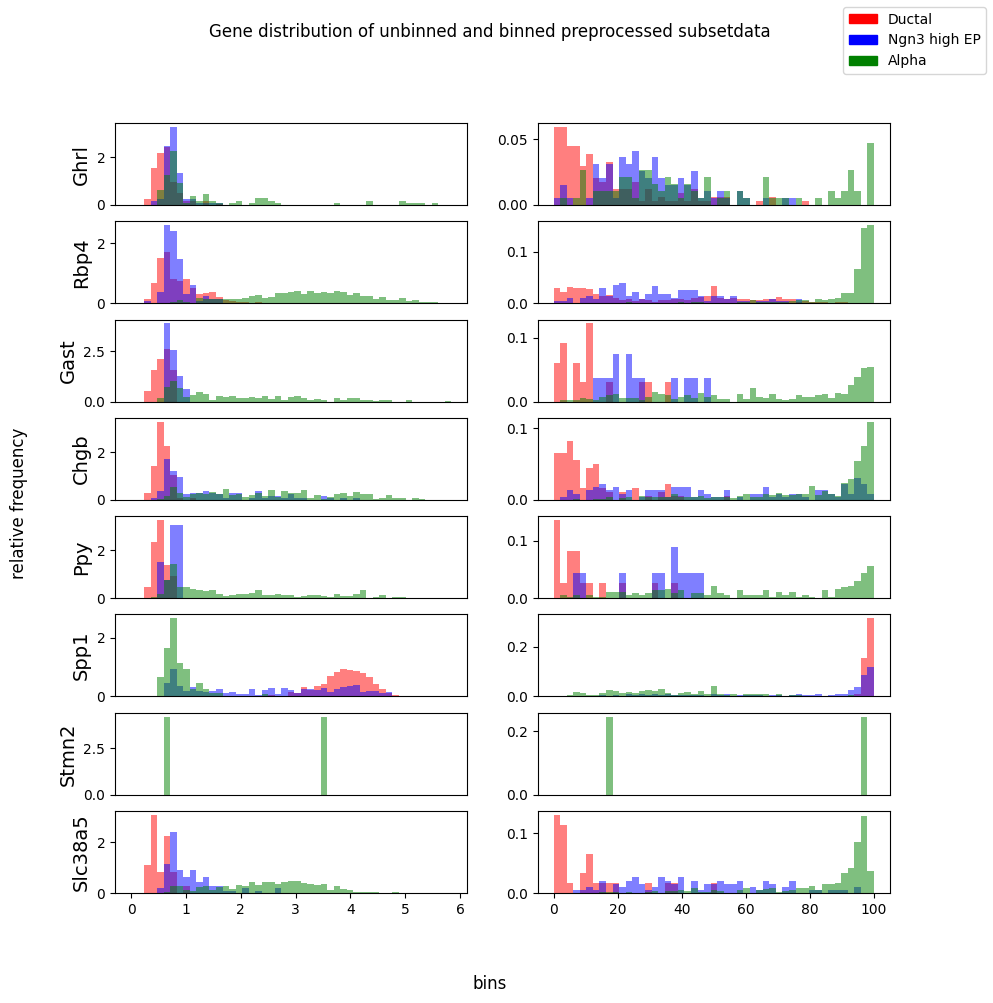

In [242]:
n_row = 8
n_col = 2
bins_raw = np.linspace(np.min(anndata.X.toarray()), np.max(anndata.X.toarray()), 50)
bins_binned = np.linspace(0, 100, 50)
idx = np.arange(len(clusters))
fig, ax = plt.subplots(n_row,n_col, figsize=(10,10), sharex=False, sharey=False)
cell_types = ['Ductal','Ngn3 high EP','Alpha']
color = ['red', 'blue', 'green']
col = 0
row = 0
k = 0
for i in range(n_row):
    gene_idx = top_disperesed_to_idx[i]
    gene_name = top_disperesed_to_idx.index[i]
    for c, ct in enumerate(cell_types):
        idx_cluster_members = idx[clusters == ct]
        profile_cluster_members_raw = anndata.X.toarray()[idx_cluster_members]
        profile_cluster_members_binned = pancreas_binned[idx_cluster_members]
#             print(profile_cluster_members[:,gene_idx].shape)
#             print(profile_cluster_members[:,gene_idx])
        cluster_gene_values_raw = profile_cluster_members_raw[:,gene_idx]
        non_zero_profiles_raw = cluster_gene_values_raw[cluster_gene_values_raw.nonzero()]
        cluster_gene_values_binned = profile_cluster_members_binned[:,gene_idx]
        non_zero_profiles_binned = cluster_gene_values_binned[cluster_gene_values_binned.nonzero()]
#             print(f'cluster {ct} has {len(profile_cluster_members)} members and {len(non_zero_profiles)}'
#                  f' samples with a non zero bin')
        ax[i, 0].hist(non_zero_profiles_raw, alpha=0.5, bins=bins_raw, density=True, color=color[c])
        ax[i, 1].hist(non_zero_profiles_binned, alpha=0.5, bins=bins_binned, density=True, color=color[c])
        ax[i, 0].set_ylabel(gene_name, fontsize=14)
        if i < n_row-1:
            ax[i, 0].set_xticks([])
            ax[i, 0].set_xticklabels([])
            ax[i, 1].set_xticks([])
            ax[i, 1].set_xticklabels([])
#         k += 1
# create patches for legend
patches = []
for i in range(len(cell_types)):
    patches.append(mpatches.Patch(color=color[i], label=cell_types[i]))
fig.legend(handles=patches, loc='upper right')
fig.supxlabel('bins')
fig.supylabel('relative frequency')
fig.suptitle('Gene distribution of unbinned and binned preprocessed subsetdata');
plt.savefig('../gene_distribution_threeSubclusters_comparison.png')

In [13]:
# check if unbinned profiles match the binned profiles
i = 0
anndata_a = anndata.X.toarray()
print(anndata_a[i][anndata_a[i].nonzero()])
print(pancreas_binned[i][pancreas_binned[i].nonzero()])

[0.811716  0.811716  1.2537732 1.5592611 0.811716  0.811716  3.1583543
 0.811716  0.811716  0.811716  0.811716  1.2537732 0.811716  0.811716
 1.2537732 0.811716  0.811716  1.7929379]
[41 41 66 77 41 41 97 41 41 41 41 66 41 41 66 41 41 84]


In [37]:
Counter(pancreas_binned[:,1]).most_common(2)

[(0, 2741), (88, 27)]

In [43]:
most_freq_hvg_bin = {}
for i in range(10):
    gene_exp = pancreas_binned[:,i]
    gene_exp = gene_exp[gene_exp>0]
    print(Counter(gene_exp).most_common(1)[0][0])
    most_freq_hvg_bin[i] = Counter(gene_exp).most_common(1)[0][0]
most_freq_hvg_bin

64
88
37
27
9
2
1
10
78
2


{0: 64, 1: 88, 2: 37, 3: 27, 4: 9, 5: 2, 6: 1, 7: 10, 8: 78, 9: 2}

In [48]:
gene_exp = pancreas_binned[:,142]
gene_exp = gene_exp[gene_exp>0]
print(Counter(gene_exp).most_common(1))

[(96, 73)]


In [23]:
import pandas as pd

In [26]:
a =[1,2,3]
b =[0,0,0]
pd.DataFrame({'hi': a, 'ho' : b})

,hi,ho
0,1,0
1,2,0
2,3,0


In [42]:
acc_most_freq = pd.read_csv('acc_most_frequent.csv')
acc_most_freq[(acc_most_freq.predictions == acc_most_freq.targets) & (acc_most_freq.targets != 0)]

,gen_idx,predictions,targets
20,89,98,98
32,142,96,96
41,185,26,26
50,29,99,99
60,83,99,99
200,99,2,2
204,129,2,2
287,80,98,98
288,83,99,99
324,83,99,99


In [44]:
acc_most_freq[acc_most_freq.targets == 0].shape

(233, 3)

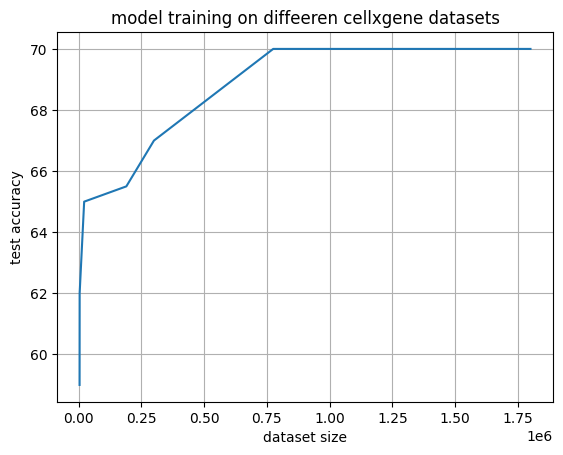

In [7]:
dataset_size = np.array([3700, 4000, 22000, 190000, 300000, 775000, 1800000])
test_acc = np.array([59, 62, 65, 65.5, 67, 70, 70])

plt.plot(dataset_size, test_acc);
plt.xlabel('dataset size')
plt.ylabel('test accuracy');
plt.title('model training on diffeeren cellxgene datasets')
plt.grid()
plt.savefig('foo.png')